<a href="https://colab.research.google.com/github/AlirezaSamari/DeepLearning-Pytorch-fastai-and/blob/main/07_Linear_model_and_neural_net_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from fastai import *
import torch

In [2]:
!pip install opendatasets

import opendatasets as od
od.download(
    "https://www.kaggle.com/competitions/titanic/data")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [3]:
df = pd.read_csv('/content/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
modes = df.mode().iloc[0] #first row of dataframe
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [6]:
df.fillna(modes, inplace = True) #replacing modes

In [7]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.describe(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


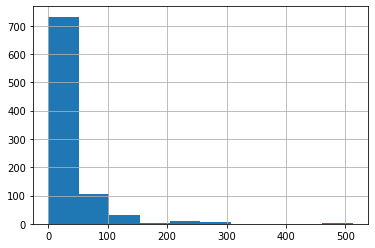

In [9]:
df['Fare'].hist();

In [10]:
classes = sorted(df['Pclass'].unique())
classes

[1, 2, 3]

In [11]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [12]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])

In [13]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,0,1,0,0,1,0,0,1


In [14]:
t_dep = torch.tensor(df.Survived)

In [15]:
df['Logfare'] = np.log(df['Fare']+1)

In [16]:
indp_cols = df[['Age', 'SibSp', 'Parch', 'Logfare', 'Sex_female','Sex_male', 'Pclass_1','Pclass_2'	,'Pclass_3',	'Embarked_C',	'Embarked_Q','Embarked_S']]
t_indep = torch.tensor(indp_cols.values, dtype = torch.float)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

In [17]:
t_indep.shape, t_dep.shape

(torch.Size([891, 12]), torch.Size([891]))

# Linear Models

In [18]:
n_coef = t_indep.shape[1]
n_coef

12

In [19]:
coefs = torch.rand(n_coef) - 0.5

In [20]:
t_indep * coefs

tensor([[ 7.7766, -0.1447, -0.0000,  ..., -0.0000,  0.0000, -0.1247],
        [13.4324, -0.1447, -0.0000,  ..., -0.1603,  0.0000, -0.0000],
        [ 9.1906, -0.0000, -0.0000,  ..., -0.0000,  0.0000, -0.1247],
        ...,
        [ 8.4836, -0.1447, -0.6747,  ..., -0.0000,  0.0000, -0.1247],
        [ 9.1906, -0.0000, -0.0000,  ..., -0.1603,  0.0000, -0.0000],
        [11.3115, -0.0000, -0.0000,  ..., -0.0000,  0.2881, -0.0000]])

In [21]:
max_indeps, idx = t_indep.max(dim = 0)
t_indep = t_indep / max_indeps

In [22]:
t_indep * coefs

tensor([[ 0.0972, -0.0181, -0.0000,  ..., -0.0000,  0.0000, -0.1247],
        [ 0.1679, -0.0181, -0.0000,  ..., -0.1603,  0.0000, -0.0000],
        [ 0.1149, -0.0000, -0.0000,  ..., -0.0000,  0.0000, -0.1247],
        ...,
        [ 0.1060, -0.0181, -0.1125,  ..., -0.0000,  0.0000, -0.1247],
        [ 0.1149, -0.0000, -0.0000,  ..., -0.1603,  0.0000, -0.0000],
        [ 0.1414, -0.0000, -0.0000,  ..., -0.0000,  0.2881, -0.0000]])

In [23]:
preds = (t_indep*coefs).sum(axis=1)

In [24]:
loss = torch.abs(preds - t_dep).mean()
loss

tensor(0.5472)

In [25]:
def calc_preds(coefs, indep): return (indep * coefs).sum(axis = 1)
def calc_loss(coefs, indep, dep): return torch.abs(calc_preds(coefs, indep) - dep).mean()

#Doing a gradient descent step

In [26]:
# coefs need grad
coefs.requires_grad_()

tensor([ 0.3535, -0.1447, -0.3374,  0.4661,  0.3440, -0.2809, -0.2256,  0.1206,
        -0.4652, -0.1603,  0.2881, -0.1247], requires_grad=True)

In [27]:
# calculating loss
loss = calc_loss(coefs, t_indep, t_dep)
loss

tensor(0.5472, grad_fn=<MeanBackward0>)

In [28]:
# Use backward() to ask PyTorch to calculate gradients now
loss.backward()

In [29]:
# See how they look like
coefs.grad

tensor([-0.2424, -0.0527, -0.0531, -0.3488, -0.2402, -0.4837, -0.2334, -0.0292,
        -0.4613, -0.1684, -0.0550, -0.5006])

Note that each time we call backward, the gradients are actually added to whatever is in the .grad attribute. Let's try running the above steps again:

In [30]:
loss = calc_loss(coefs, t_indep, t_dep)
coefs.requires_grad_()
loss.backward()
coefs.grad

tensor([-0.4848, -0.1055, -0.1062, -0.6975, -0.4804, -0.9675, -0.4669, -0.0584,
        -0.9226, -0.3367, -0.1100, -1.0011])

we need to set `.grad` back to zero.

In [31]:
loss = calc_loss(coefs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
  coefs.sub_(coefs.grad * 0.1)
  coefs.grad.zero_()
  print(calc_loss(coefs, t_indep, t_dep))


tensor(0.3343)


#Training a linear model

In [32]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [33]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]

In [34]:
len(trn_indep), len(val_indep)

(713, 178)

In [35]:
def update_coefs(coefs, lr):
  coefs.sub_(coefs.grad*lr)
  coefs.grad.zero_()

In [36]:
def one_epoch(coefs, lr):
  loss = calc_loss(coefs, trn_indep, trn_dep)
  loss.backward()
  with torch.no_grad():
    update_coefs(coefs, lr)
    print(f'{loss}', end=";")

In [37]:
def init_coefs(): return (torch.rand(n_coef)-0.5).requires_grad_()

In [38]:
def train_model(epochs=30, lr = 0.1):
  torch.manual_seed(442)
  coefs = init_coefs()
  for i in range(epochs): one_epoch(coefs, lr)
  return coefs

In [39]:
coefs = train_model(18, lr = 0.2)

0.5182632207870483;0.49105992913246155;0.46790972352027893;0.4447985291481018;0.42182889580726624;0.39968982338905334;0.378359854221344;0.35784628987312317;0.3402935862541199;0.326643168926239;0.31500792503356934;0.30641376972198486;0.3081037104129791;0.3106144666671753;0.3114265203475952;0.2917688190937042;0.295657753944397;0.2872138023376465;

In [40]:
coefs_dict = dict(zip(indp_cols, coefs.requires_grad_(False)))
#print(coefs_dict)
for i in coefs_dict:
  print(f'{i}:{coefs_dict[i]}')

Age:-0.2580804228782654
SibSp:0.0894206240773201
Parch:0.23463615775108337
Logfare:0.027542727068066597
Sex_female:0.2573692202568054
Sex_male:-0.41289231181144714
Pclass_1:0.7097694277763367
Pclass_2:0.4246487021446228
Pclass_3:0.3690837621688843
Embarked_C:0.09548303484916687
Embarked_Q:0.2489984780550003
Embarked_S:0.21160176396369934


In [41]:
preds = calc_preds(coefs, val_indep)

In [42]:
loss = calc_loss(coefs, val_indep, val_dep)
loss

tensor(0.2842)

In [43]:
results = val_dep.bool() == (preds > 0.5)
results[:16] 

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False,  True,  True, False])

In [44]:
avg_acc = results.float().mean()
avg_acc

tensor(0.7978)

In [45]:
def acc(coefs): return (val_dep.bool() == (calc_preds(coefs, val_indep) > 0.5)).float().mean()

In [46]:
acc(coefs)

tensor(0.7978)

# Using sigmoid

Looking at our predictions, there's one obvious problem -- some of our predictions of the probability of survival are >1, and some are <0:

In [47]:
preds[:25]

tensor([ 0.8650,  0.1373, -0.0164,  0.1843,  0.1544,  0.1385,  0.7599,  0.8149,
         0.3157,  0.7087,  0.0742,  0.0368,  0.2162,  0.8077,  0.0670,  0.3779,
         0.3134,  0.8666,  0.1121,  0.7481,  0.1000,  0.3425,  1.0079,  0.8467,
         0.1125])

In [48]:
def sigmoid(x): return 1/(1 + torch.exp(-x))
x = torch.linspace(-5, 5, 20)

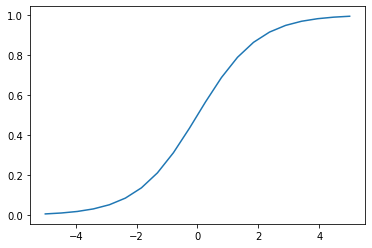

In [49]:
y = sigmoid(x)
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [50]:
def calc_preds(coefs, indep): return torch.sigmoid((indep*coefs).sum(dim = 1))

In [51]:
coefs = train_model(lr = 100)

0.5029377341270447;0.32607051730155945;0.29391589760780334;0.2071153074502945;0.20074781775474548;0.19870305061340332;0.1976623386144638;0.1969517022371292;0.19643563032150269;0.1960422396659851;0.19573019444942474;0.19547471404075623;0.19526025652885437;0.19507665932178497;0.19491705298423767;0.19477656483650208;0.19465164840221405;0.1945396363735199;0.19443851709365845;0.194346621632576;0.19426272809505463;0.1941857486963272;0.19411486387252808;0.19404935836791992;0.19398857653141022;0.19393208622932434;0.1938793659210205;0.19383010268211365;0.1937839388847351;0.1937406063079834;

In [52]:
acc(coefs)

tensor(0.8258)

# Using matrix product

In [53]:
(val_indep * coefs).sum(dim=1)

tensor([ 12.3344, -14.8963, -15.5310, -13.2356, -13.4334, -13.7300,   3.6332,
          5.3455, -22.1751,   3.1302, -21.9617, -15.7197, -21.6367,   3.9399,
        -22.0063, -12.0769, -12.4543,   5.3571, -13.6718,  -3.1041, -21.8109,
        -12.2845,  12.9945,   4.7428, -21.7393, -14.9992,  -2.7445, -12.3977,
        -21.6755,   3.9393,   5.3925,  -3.6226, -21.7165, -21.9329,  12.2212,
         -3.2294, -12.1052,  13.4747, -21.8102,  -3.1386, -13.3279, -21.8102,
        -13.7664,  13.3275, -21.7347,  -3.5907, -21.7752, -21.9191, -14.9000,
         -2.9406,  -5.3848, -22.3260, -22.1969, -21.8337, -13.4600, -13.5733,
        -14.8962, -22.1574, -21.7536, -21.8701,  -5.5092, -21.8272, -12.7328,
        -21.7541,   4.9249, -11.6538, -13.4146, -22.0530, -15.3886,   5.0261,
        -21.8486,   3.1896, -13.5544, -21.8043, -11.6815, -21.6604, -21.8102,
        -12.0423, -13.3202, -13.8433, -13.2992,  13.1525, -21.7920, -21.8138,
          4.9226,  -7.3930,  -5.3745,   7.1156,  11.5067, -13.39

In [54]:
val_indep@coefs

tensor([ 12.3344, -14.8963, -15.5310, -13.2355, -13.4334, -13.7300,   3.6332,
          5.3455, -22.1751,   3.1302, -21.9617, -15.7196, -21.6367,   3.9399,
        -22.0063, -12.0769, -12.4543,   5.3571, -13.6718,  -3.1041, -21.8109,
        -12.2845,  12.9945,   4.7428, -21.7393, -14.9992,  -2.7445, -12.3977,
        -21.6755,   3.9393,   5.3925,  -3.6226, -21.7165, -21.9329,  12.2212,
         -3.2294, -12.1052,  13.4747, -21.8102,  -3.1386, -13.3279, -21.8102,
        -13.7664,  13.3275, -21.7347,  -3.5907, -21.7752, -21.9191, -14.9000,
         -2.9406,  -5.3848, -22.3260, -22.1969, -21.8337, -13.4600, -13.5733,
        -14.8962, -22.1574, -21.7536, -21.8701,  -5.5092, -21.8272, -12.7328,
        -21.7541,   4.9249, -11.6538, -13.4146, -22.0530, -15.3886,   5.0261,
        -21.8486,   3.1896, -13.5544, -21.8043, -11.6815, -21.6604, -21.8102,
        -12.0423, -13.3202, -13.8433, -13.2992,  13.1525, -21.7920, -21.8138,
          4.9226,  -7.3930,  -5.3745,   7.1156,  11.5067, -13.39

In [55]:
def calc_preds(coefs, indeps): return torch.sigmoid(indeps@coefs) 

In [56]:
def init_coefs(): return (torch.rand(n_coef, 1)*0.1).requires_grad_()

In [57]:
trn_dep = trn_dep[:, None]
val_dep = val_dep[:, None]

In [58]:
coefs = train_model(lr = 100)

0.5116649866104126;0.32289427518844604;0.2903457283973694;0.2046908587217331;0.19992761313915253;0.19833853840827942;0.19736330211162567;0.19669383764266968;0.19620876014232635;0.19584046304225922;0.1955496221780777;0.19531245529651642;0.19511409103870392;0.19494472444057465;0.19479773938655853;0.1946684867143631;0.19455359876155853;0.19445058703422546;0.1943574845790863;0.19427284598350525;0.1941954642534256;0.19412441551685333;0.1940588802099228;0.19399823248386383;0.1939419060945511;0.19388940930366516;0.19384042918682098;0.19379451870918274;0.1937514841556549;0.19371099770069122;

In [59]:
acc(coefs)

tensor(0.8258)

#A neural network

In [60]:
def init_coefs(n_hidden = 20):
  layer1 = (torch.rand(n_coef, n_hidden) - 0.5)/n_hidden
  layer2 = torch.rand(n_hidden, 1) - 0.3
  const = torch.rand(1)[0]
  return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [61]:
import torch.nn.functional as F
def calc_preds(coefs, indeps):
  l1, l2, const = coefs
  res = F.relu(indeps@l1)
  res = res@l2 + const
  return torch.sigmoid(res)

In [62]:
def update_coefs(coefs, lr):
    for layer in coefs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [63]:
coefs = train_model(lr = 1.4)

0.5436185002326965;0.5330772995948792;0.5211246609687805;0.5034240484237671;0.4830425977706909;0.4592666029930115;0.42915967106819153;0.3944995403289795;0.35844507813453674;0.32674747705459595;0.3022294342517853;0.28424543142318726;0.2708721160888672;0.26066434383392334;0.2527357041835785;0.24649587273597717;0.24152381718158722;0.23750953376293182;0.23422284424304962;0.2314935326576233;0.22919490933418274;0.2272309809923172;0.2255302518606186;0.22403724491596222;0.2227104753255844;0.22151653468608856;0.22042949497699738;0.21942922472953796;0.21849997341632843;0.21762938797473907;

In [64]:
coefs = train_model(lr = 20)

0.5436185002326965;0.4033687710762024;0.2340763956308365;0.3337007164955139;0.20660588145256042;0.20603173971176147;0.2098095417022705;0.19471995532512665;0.19412678480148315;0.1937556117773056;0.19352678954601288;0.19336672127246857;0.19324016571044922;0.19314110279083252;0.19305621087551117;0.19298624992370605;0.1929265260696411;0.19287388026714325;0.192827969789505;0.1927877813577652;0.19275221228599548;0.19272124767303467;0.19269436597824097;0.1926690638065338;0.19264604151248932;0.19262519478797913;0.19260640442371368;0.19258849322795868;0.19257189333438873;0.19255654513835907;

In [65]:
acc(coefs)

tensor(0.8258)

#Deep learning

In [66]:
def init_coefs():
  hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
  sizes = [n_coef] + hiddens + [1]
  n = len(sizes)
  layers = [(torch.rand(sizes[i], sizes[i+1]) - 0.3)/sizes[i+1]*4 for i in range(n-1)]
  consts = [(torch.rand(1)[0] - 0.5)*0.1 for i in range(n-1)]
  for i in layers + consts:
    i.requires_grad_()
  return layers, consts

In [67]:
import torch.nn.functional as F
def calc_preds(coefs, indeps):
  layers, consts = coefs
  n = len(layers)
  res = indeps
  for i, j in enumerate(layers):
    res = res@j + consts[i]
    if i!= n-1 : res = F.relu(res)
  return torch.sigmoid(res)

In [68]:
def update_coefs(coefs, lr):
  layers, consts = coefs
  for layer in layers + consts:
    layer.sub_(layer.grad * lr)
    layer.grad.zero_()

In [69]:
coefs = train_model(lr = 4)

0.5140965580940247;0.48286116123199463;0.4690192639827728;0.45656928420066833;0.4458262622356415;0.4368015229701996;0.4293316900730133;0.4231531322002411;0.4179285168647766;0.41080161929130554;0.37623363733291626;0.36959001421928406;0.3641104996204376;0.35786551237106323;0.3480323851108551;0.310392290353775;0.2269536256790161;0.20786063373088837;0.2085295468568802;0.2198636531829834;0.20481839776039124;0.20395535230636597;0.21112574636936188;0.19728337228298187;0.19609300792217255;0.19508981704711914;0.1944645494222641;0.1941530406475067;0.19395649433135986;0.19379830360412598;

In [70]:
acc(coefs)

tensor(0.8258)